In [1]:
import pandas as pd 
from bs4 import BeautifulSoup 
raw = pd.read_csv("labeledTrainData.tsv", header=0, delimiter="\t", quoting=3)
raw.shape

(25000, 3)

In [3]:
raw.columns.values

array(['id', 'sentiment', 'review'], dtype=object)

In [4]:
#train.head
train=raw[0:15000]

In [1]:
#train.shape
#import nltk
print "trying"
#nltk.download()
from nltk.corpus import stopwords # Import the stop word list
print stopwords.words("english")

trying
[u'i', u'me', u'my', u'myself', u'we', u'our', u'ours', u'ourselves', u'you', u'your', u'yours', u'yourself', u'yourselves', u'he', u'him', u'his', u'himself', u'she', u'her', u'hers', u'herself', u'it', u'its', u'itself', u'they', u'them', u'their', u'theirs', u'themselves', u'what', u'which', u'who', u'whom', u'this', u'that', u'these', u'those', u'am', u'is', u'are', u'was', u'were', u'be', u'been', u'being', u'have', u'has', u'had', u'having', u'do', u'does', u'did', u'doing', u'a', u'an', u'the', u'and', u'but', u'if', u'or', u'because', u'as', u'until', u'while', u'of', u'at', u'by', u'for', u'with', u'about', u'against', u'between', u'into', u'through', u'during', u'before', u'after', u'above', u'below', u'to', u'from', u'up', u'down', u'in', u'out', u'on', u'off', u'over', u'under', u'again', u'further', u'then', u'once', u'here', u'there', u'when', u'where', u'why', u'how', u'all', u'any', u'both', u'each', u'few', u'more', u'most', u'other', u'some', u'such', u'no', u'

In [6]:
test=raw[15000:]

In [12]:
test.shape

NameError: name 'test' is not defined

In [14]:
print train[0:2]
train["review"][0]

         id  sentiment                                             review
0  "5814_8"          1  "With all this stuff going down at the moment ...
1  "2381_9"          1  "\"The Classic War of the Worlds\" by Timothy ...


'"With all this stuff going down at the moment with MJ i\'ve started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ\'s feeling towards the press and also the obvious message of drugs are bad m\'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally

In [13]:

example1 = BeautifulSoup(train["review"][0]) 
print example1.get_text()

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.The actual feature film bit when it finally starts is only on for 20 mi

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from nltk.corpus import stopwords 
from matplotlib import pyplot as pl
from nltk.stem.lancaster import LancasterStemmer
from sklearn.metrics import roc_curve, auc
from sklearn import svm
from sklearn import svm
from __future__ import division
import pandas as pd 
from bs4 import BeautifulSoup
import re
import time

#reading input file
raw = pd.read_csv("labeledTrainData.tsv", header=0, delimiter="\t", quoting=3)
raw.shape

#spliting the data into training and test data
train=raw[0:15000]
test=raw[15000:]

#Function calculates the accuracy of the model
def error_accuracy(output,test):
    diff=0
    tp_0=0
    tp_1=0
    fp_0=0
    fp_1=0
    for i in range(15000,25000):
        if((output[i-15000])!=(test["sentiment"][i])):
            diff+=1
            if(output[i-15000]==0):
                fp_1+=1
            elif(output[i-15000]==1):
                fp_0+=1
        else:
            if(output[i-15000]==0):
                tp_0+=1
            elif(output[i-15000]==1):
                tp_1+=1
    print diff
    print "tp_0",tp_0
    print "tp_1",tp_1
    print "fp_0",fp_0
    print "fp_1",fp_1
    error = diff/len(output)
    print "error %:", (100-(error*100))

#function builds the random forest classifier
def random_forest(train_features,test_features,train,test):
    start = time.clock()
    random_forest = RandomForestClassifier(n_estimators = 400) 
    random_forest.fit( train_features, train["sentiment"] )
    result = random_forest.predict(test_features)
    stop = time.clock()
    output = result
    print "Random Forest Accuracy:"
    error_accuracy(output,test)
    print "Perf_RF", stop-start
#function builds the Naive Bayes Classsifier
def naive_bayes(train_features,test_features,train,test):
    start = time.clock()
    nb = GaussianNB()
    nb=nb.fit(train_features, train["sentiment"])
    result_nb=nb.predict(test_features)
    stop = time.clock()
    output_nb = result_nb
    print "Naive Bayes Accuracy:"
    error_accuracy(output_nb,test)
    print "Perf_NB", stop-start
#function builds the support vector machine
def support_vector_machine(train_features,test_features,train,test):
    start = time.clock()
    classifier_liblinear = svm.LinearSVC()
    classifier_liblinear.fit(train_features, train["sentiment"])
    prediction_liblinear = classifier_liblinear.predict(test_features)
    stop = time.clock()
    output_svm = prediction_liblinear
    print "Support Vector Machine Accuracy:"
    error_accuracy(output_svm,test)
    print "Perf_SVM", stop-start

#Function does the data cleaning and processing
def text_processing( raw_data ):
    
    #Removeing HTML
    raw_data = BeautifulSoup(raw_data).get_text() 
    
    #keeps only the letters and removes the rest from the text       
    no_punc = re.sub("[^a-zA-Z]", " ", raw_data) 
    
    #Convert to lower case, split into individual words
    words = no_punc.lower()
    words=words.split()
    
    
    stop_words = stopwords.words("english")                  
    
    #Removeing stop words
    stemmed_words = []
    lancaster_stemmer = LancasterStemmer()
    for word in words:
        if word not in stop_words:
            lancaster_stemmer.stem(word)
            stemmed_words.append(word) 
            
    combined_data = " ".join( stemmed_words )
    return(combined_data) 

len_rev = train["review"].size

#Sending the training data to clean
cl_train_data = []
for i in range( 0, len_rev ):                                                                 
    cl_train_data.append( text_processing( train["review"][i] ))

#Forming features from the training data using the most repeated words
vec_feature = CountVectorizer(max_features = 5000) 
train_features = vec_feature.fit_transform(cl_train_data)
train_features = train_features.toarray()

print "train features done"

len_rev = len(test["review"])
cl_test_data = [] 
#Sending the test data to clean
for i in range(15000,25000):
    cl_test_data.append( text_processing( test["review"][i] ) )
    
#Forming features from the test data to be classified
test_features = vec_feature.transform(cl_test_data)
test_features = test_features.toarray()

#calls the repective model to classify the test data
random_forest(train_features,test_features,train,test)
naive_bayes(train_features,test_features,train,test)
support_vector_machine(train_features,test_features,train,test)

train features done
Random Forest Accuracy:
1480
tp_0 4261
tp_1 4259
fp_0 726
fp_1 754
error %: 85.2
Perf_RF 334.267901
Naive Bayes Accuracy:
2569
tp_0 4301
tp_1 3130
fp_0 686
fp_1 1883
error %: 74.31
Perf_NB 3.510879
Support Vector Machine Accuracy:
1675
tp_0 4174
tp_1 4151
fp_0 813
fp_1 862
error %: 83.25
Perf_SVM 2.804123


In [17]:
from matplotlib import pyplot as pl
import numpy as np
import pandas as pd 
pl.clf()
pl.plot(fpr1, tpr1, label='Random_Forest (area = %0.2f)' % roc_auc1)
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic example')
pl.legend(loc="lower right")
pl.show()

NameError: name 'fpr1' is not defined

In [26]:
output["sentiment"][15000]

1

In [31]:
from __future__ import division

diff=0
for i in range(15000,25000):
    if((output["sentiment"][i])!=(test["sentiment"][i])):
        diff+=1
print diff
error = diff/len(output)
print "error %:", error*100

1523
error %: 15.23


In [32]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb=nb.fit(train_data_features, train["sentiment"])
result_nb=nb.predict(test_data_features)
output_nb = pd.DataFrame( data={"id":test["id"], "sentiment":result_nb} )

In [33]:
from __future__ import division

diff=0
for i in range(15000,25000):
    if((output_nb["sentiment"][i])!=(test["sentiment"][i])):
        diff+=1
print diff
error = diff/len(output_nb)
print "error %:", error*100

2569
error %: 25.69


In [30]:
from sklearn import svm
from __future__ import division
classifier_liblinear = svm.LinearSVC()
classifier_liblinear.fit(train_data_features, train["sentiment"])
prediction_liblinear = classifier_liblinear.predict(test_data_features)
output_svm = pd.DataFrame( data={"id":test["id"], "sentiment":prediction_liblinear} )
diff1=0
for i in range(15000,25000):
    if((output_svm["sentiment"][i])!=(test["sentiment"][i])):
        diff1+=1
print diff1
error1 = diff1/len(output_svm)
print "error %:", error1*100

1676
error %: 16.76


In [86]:
from nltk.stem.lancaster import LancasterStemmer
lancaster_stemmer = LancasterStemmer()
lancaster_stemmer.stem('churches')

'church'

In [70]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
#wordnet_lemmatizer.lemmatize('very',pos='v')
wordnet_lemmatizer.lemmatize('working')

'working'

In [77]:
result_nb

array([0, 0, 0, ..., 1, 1, 0])

In [81]:
sto = stopwords.words("english") 
print sto

[u'i', u'me', u'my', u'myself', u'we', u'our', u'ours', u'ourselves', u'you', u'your', u'yours', u'yourself', u'yourselves', u'he', u'him', u'his', u'himself', u'she', u'her', u'hers', u'herself', u'it', u'its', u'itself', u'they', u'them', u'their', u'theirs', u'themselves', u'what', u'which', u'who', u'whom', u'this', u'that', u'these', u'those', u'am', u'is', u'are', u'was', u'were', u'be', u'been', u'being', u'have', u'has', u'had', u'having', u'do', u'does', u'did', u'doing', u'a', u'an', u'the', u'and', u'but', u'if', u'or', u'because', u'as', u'until', u'while', u'of', u'at', u'by', u'for', u'with', u'about', u'against', u'between', u'into', u'through', u'during', u'before', u'after', u'above', u'below', u'to', u'from', u'up', u'down', u'in', u'out', u'on', u'off', u'over', u'under', u'again', u'further', u'then', u'once', u'here', u'there', u'when', u'where', u'why', u'how', u'all', u'any', u'both', u'each', u'few', u'more', u'most', u'other', u'some', u'such', u'no', u'nor', u

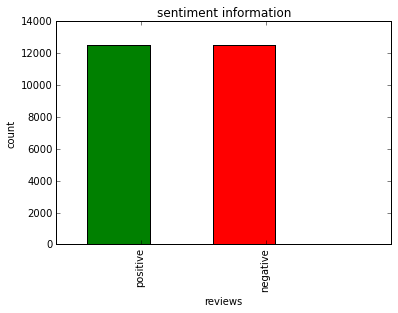

In [19]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd 
%matplotlib inline 
test=[77.32,74.31,83.21]
OX =["positive","negative"]
s = pd.Series(
    [12500,12500],
    index = ["pos_reviews","neg_reviews"]
)
my_colors = 'gr'
width = .35
ind = np.arange(len(test))
pd.Series.plot(
    s, 
    kind='bar', 
    color=my_colors,
)
#b=plt.bar(ind, test, width=width)
plt.xticks(ind + width / 2, OX)
#plt.yticks(np.arange(0, max(test)+10, 5.0))
plt.ylabel('count')
plt.xlabel("reviews")
plt.title("sentiment information")
plt.show()

In [8]:
leng= len(raw)
one=0
zero=0
for i in range(15000,leng):
    if(raw["sentiment"][i]==0):
        zero+=1
    else:
        one+=1
print zero
print one
    

4987
5013


In [5]:
raw[]

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."
5,"""8196_8""",1,"""I dont know why people think this is such a b..."
6,"""7166_2""",0,"""This movie could have been very good, but com..."
7,"""10633_1""",0,"""I watched this video at a friend's house. I'm..."
8,"""319_1""",0,"""A friend of mine bought this film for £1, and..."
9,"""8713_10""",1,"""<br /><br />This movie is full of references...."
